In [4]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy
import PIL
import requests

In [5]:
df = pd.read_csv("../project/Customers3_oversampled.csv", header = 0, names = columns)


In [6]:
print(df.columns.tolist())


['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Item_Category', 'Purchase_Amount_(USD)', 'Location', 'Color', 'Season', 'Review_Rating', 'Subscription_Status', 'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases', 'Payment Method', 'Frequency of Purchases']


C:\Users\aktur\AppData\Local\Temp\ipykernel_14204\2768727871.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Age Group', order=labels, palette='muted')


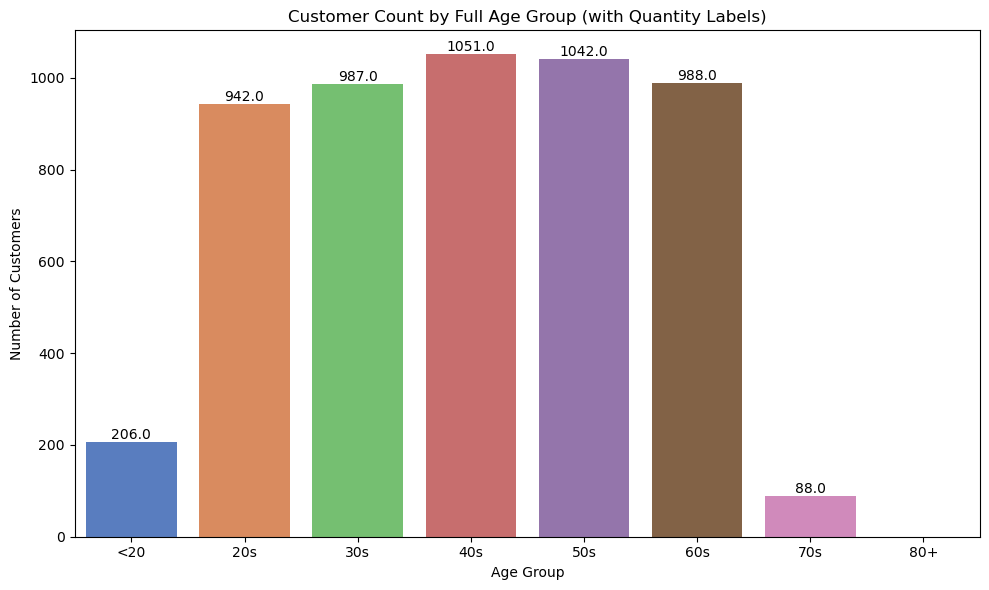

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and labels
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]
labels = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80+']

# Create the 'Age Group' column using pd.cut()
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)


# Plot with count annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', order=labels, palette='muted')

# Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Customer Count by Full Age Group (with Quantity Labels)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [13]:
#This chart displays the distribution of customers across different age groups, categorized into defined age bins (e.g., 20s, 30s, etc.). The bars represent the number of customers in each group, with quantity labels added for clarity.
#The 20s and 30s age groups have the highest concentration of customers, indicating that younger adults form the core of our customer base.
#The number of customers gradually declines with age, with fewer customers aged 60 and above.
#The <20 age group is relatively small, suggesting limited engagement from teenagers.
#The majority of our customers fall between the ages of 20 to 39, making this a key demographic for campaigns, product design, and customer loyalty programs.

C:\Users\aktur\AppData\Local\Temp\ipykernel_14204\595697413.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_purchase = df.groupby(['Age Group', 'Gender'])['Purchase_Amount_(USD)'].mean().reset_index()


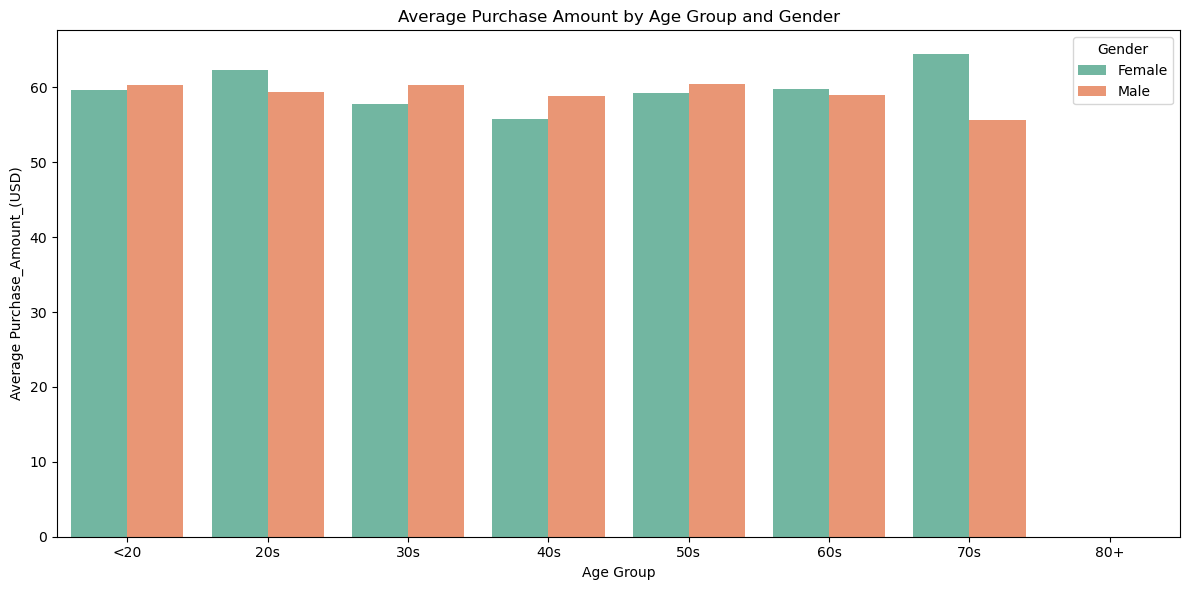

In [8]:
grouped_purchase = df.groupby(['Age Group', 'Gender'])['Purchase_Amount_(USD)'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_purchase,
            x='Age Group',
            y='Purchase_Amount_(USD)',
            hue='Gender',
            order=['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80+'],
            palette='Set2')

plt.title('Average Purchase Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase_Amount_(USD)')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
#This bar chart illustrates the average amount spent per purchase, segmented by both age group and gender. The age groups are evenly categorized by decades (e.g., 20s, 30s, 40s), and the comparison between genders provides insights into customer value across different demographics.
#Customers in their 30s and 40s tend to spend the most on average, regardless of gender.
#In many age groups, female customers spend slightly more on average than male customers. However, this varies by group and isn’t universal.
#After age 60, average purchase amounts decline for both genders, suggesting reduced spending or more conservative purchasing habits in older customers.
#This analysis helps identify which demographics offer the highest purchase value, guiding us toward smarter pricing, advertising, and customer engagement strategies.

In [9]:
loc_counts=df.groupby("Location").size().sort_values(ascending=False)
top_location=loc_counts.idxmax()
top_count=loc_counts.max()
print(f"Location with the highest number of purchases: {top_location} ({top_count})")

Location with the highest number of purchases: Montana (142)


C:\Users\aktur\AppData\Local\Temp\ipykernel_14204\1989126031.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top30,


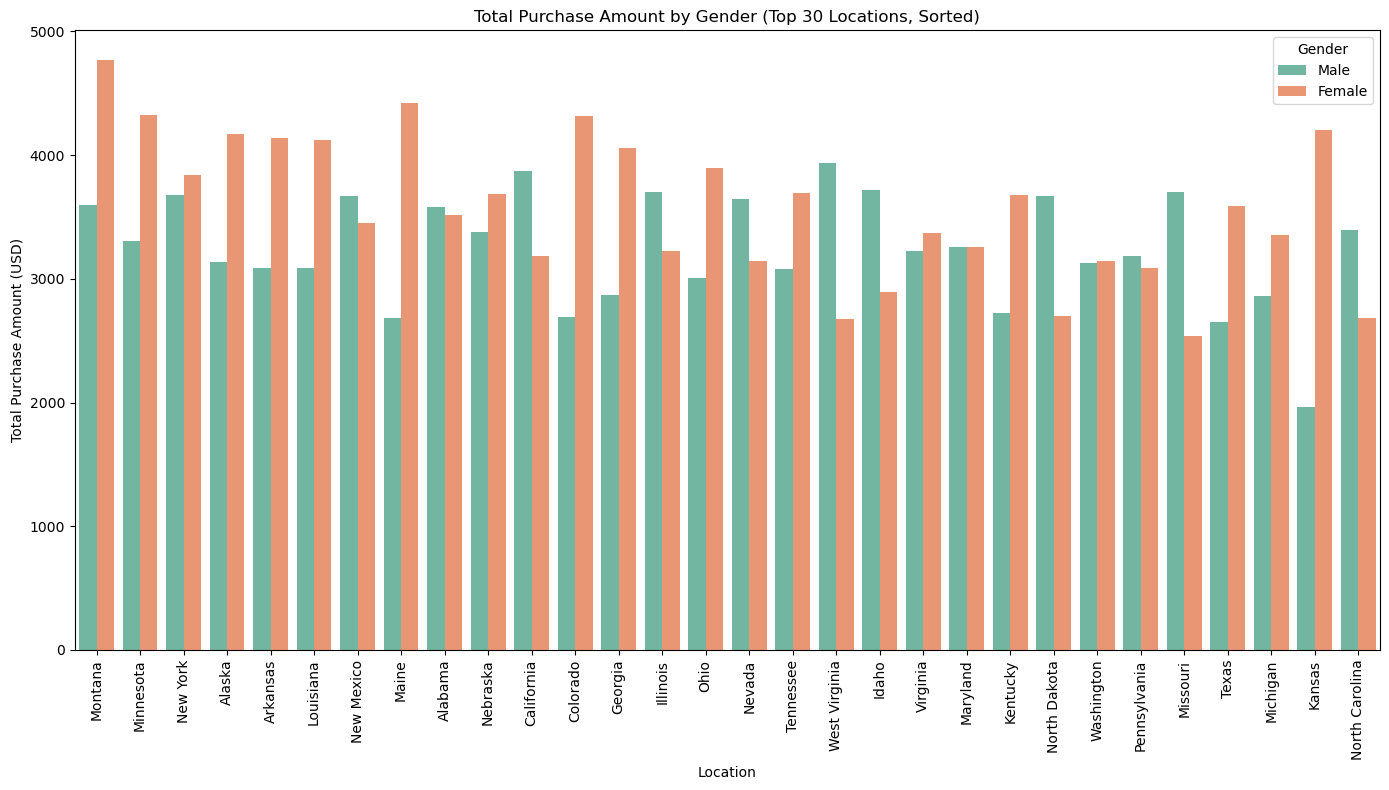

In [10]:
# Get top 30 locations by total purchase amount
top30_locations = df.groupby('Location')['Purchase_Amount_(USD)'].sum().nlargest(30).index
df_top30 = df[df['Location'].isin(top30_locations)]

# Sort by total purchase amount (not average this time)
location_order = (
    df_top30.groupby('Location')['Purchase_Amount_(USD)']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Plot total purchase amount by gender and location
plt.figure(figsize=(14, 8))
sns.barplot(data=df_top30,
            x='Location',
            y='Purchase_Amount_(USD)',
            hue='Gender',
            order=location_order,
            estimator=sum,
            ci=None,
            palette='Set2')

plt.title('Total Purchase Amount by Gender (Top 30 Locations, Sorted)')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

C:\Users\aktur\AppData\Local\Temp\ipykernel_14204\1241057231.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top30,


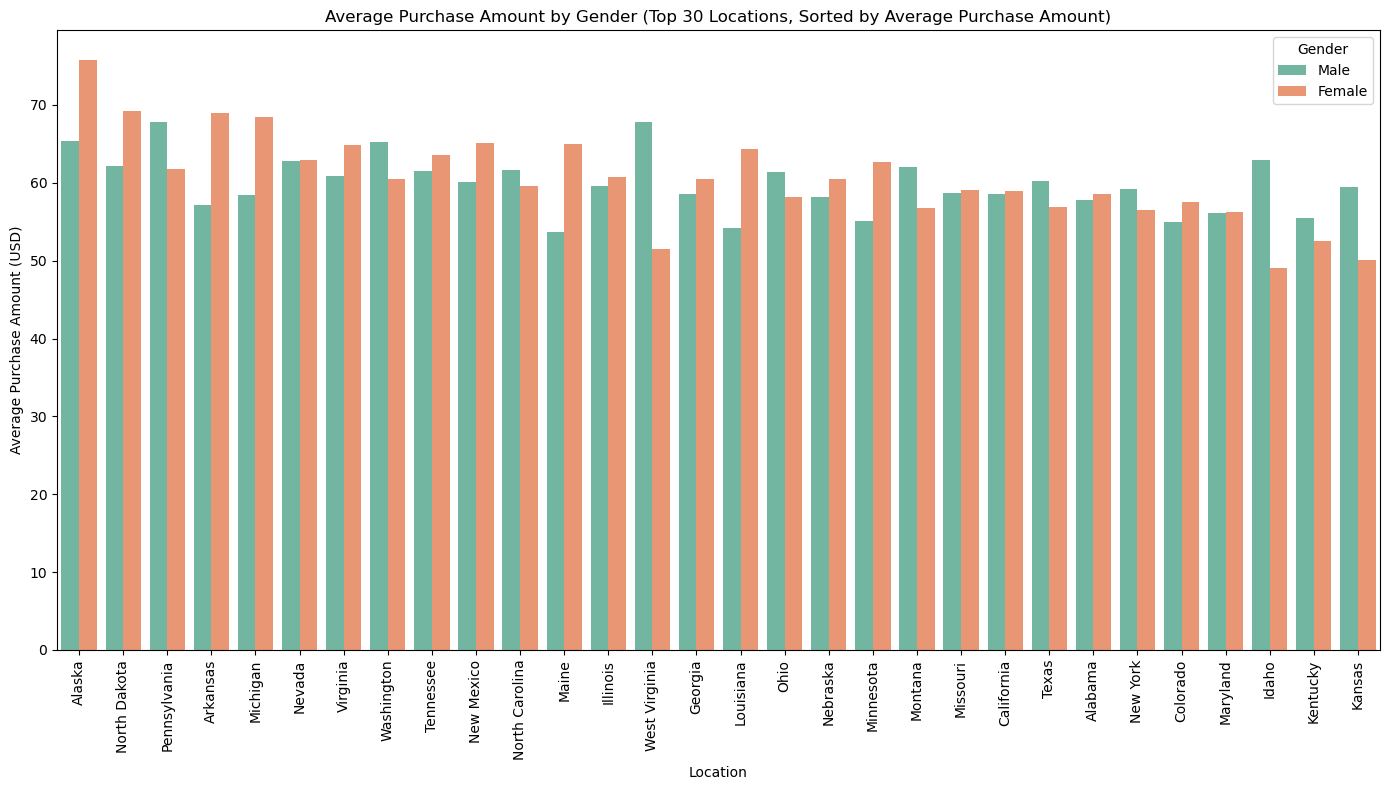

In [11]:
# Sort top 30 locations by average purchase amount
location_order_avg = (
    df_top30.groupby('Location')['Purchase_Amount_(USD)']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Plot again using average purchase amount for sorting
plt.figure(figsize=(14, 8))
sns.barplot(data=df_top30,
            x='Location',
            y='Purchase_Amount_(USD)',
            hue='Gender',
            order=location_order_avg,
            ci=None,
            palette='Set2')

plt.title('Average Purchase Amount by Gender (Top 30 Locations, Sorted by Average Purchase Amount)')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()



In [ ]:
#The chart now shows the top 30 locations sorted by average purchase amount per location, providing a clearer view of where individual customers tend to spend the most.
#Sorting by average purchase amount reveals where individual customers spend the most per transaction, regardless of how many customers there are.
#This helps us find locations with high-value purchasing behavior, not just large customer populations. High-value customers (even if fewer in number)
#Areas where smaller, high-end stores might outperform large-volume outlets
#While total purchase amount shows where we make the most money overall, it is heavily influenced by population size or the number of buyers.
#High total revenue doesn’t always mean high individual customer value—it may simply reflect a large customer base with low average spend.
#This approach supports smarter decisions about product positioning, pricing strategies, and where to invest in premium retail experiences.

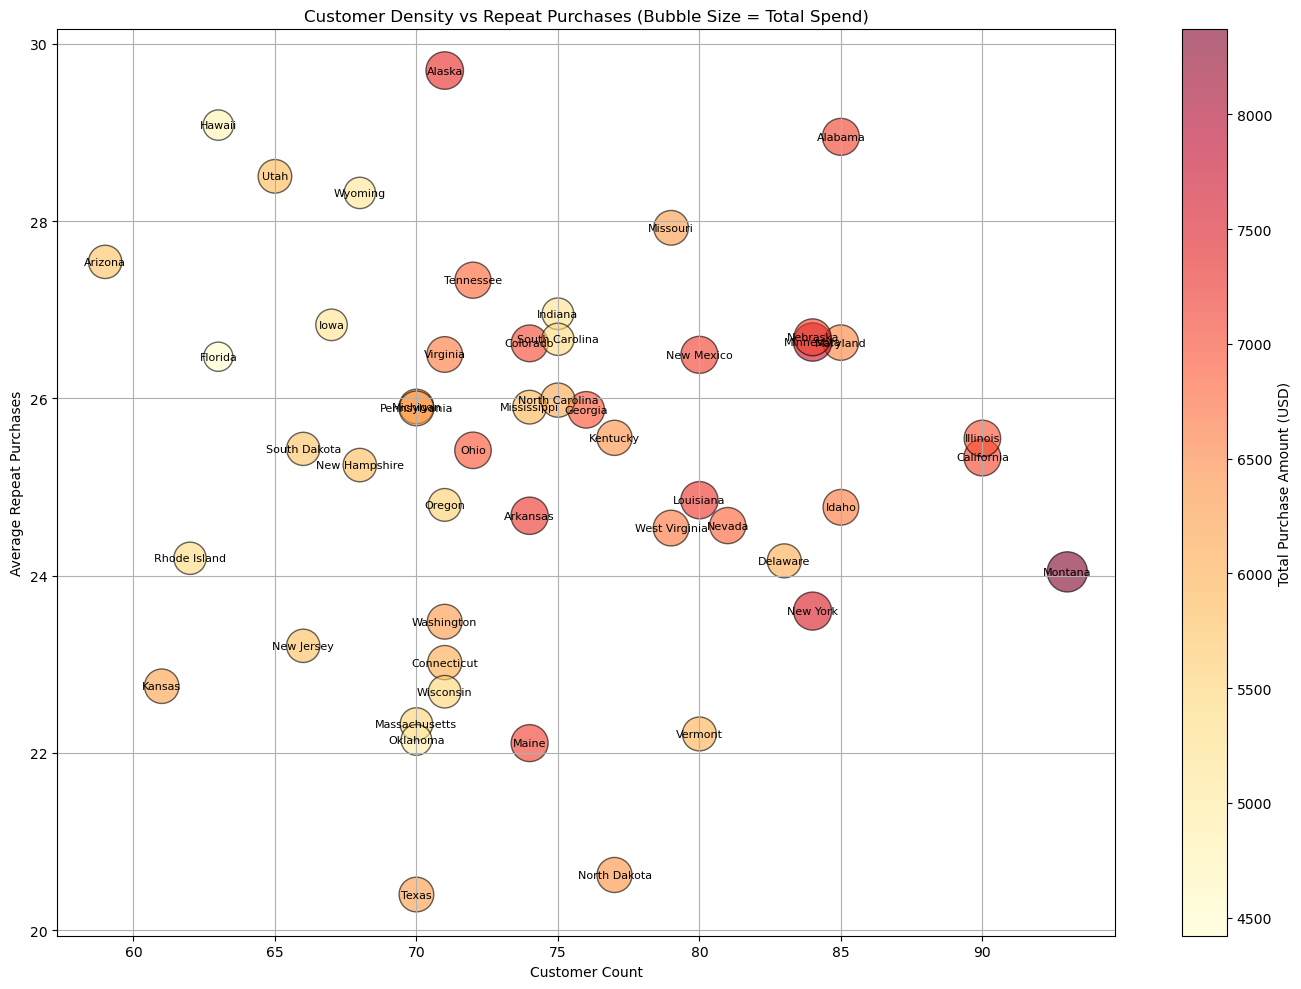

In [12]:
# Prepare data for bubble plot
customer_count = df.groupby('Location')['Customer_ID'].nunique()
repeat_purchases = df.groupby('Location')['Previous_Purchases'].mean()
total_purchase = df.groupby('Location')['Purchase_Amount_(USD)'].sum()

# Combine into one DataFrame
bubble_data = pd.DataFrame({
    'Customer Count': customer_count,
    'Avg Repeat Purchases': repeat_purchases,
    'Total Purchase Amount': total_purchase
}).reset_index()

# Plot the bubble chart
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    x=bubble_data['Customer Count'],
    y=bubble_data['Avg Repeat Purchases'],
    s=bubble_data['Total Purchase Amount'] / 10,  # scale bubble size
    alpha=0.6,
    c=bubble_data['Total Purchase Amount'],
    cmap='YlOrRd',
    edgecolors='black'
)

# Add location labels
for i, row in bubble_data.iterrows():
    plt.text(row['Customer Count'], row['Avg Repeat Purchases'], row['Location'], fontsize=8, ha='center', va='center')

plt.colorbar(scatter, label='Total Purchase Amount (USD)')
plt.title('Customer Density vs Repeat Purchases (Bubble Size = Total Spend)')
plt.xlabel('Customer Count')
plt.ylabel('Average Repeat Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
#The most attractive locations for opening a new store are those with a high number of customers, strong loyalty, and large total spending. 
#These are visualized as large, dark bubbles in the upper-right of the plot.
#Locations in the top-right quadrant with large, dark bubbles are strong candidates for store expansion. 
# These regions combine:large and loyal customer base High total spending
#Locations with a large customer base but low repeat purchases may benefit from targeted loyalty programs or promotions before committing to physical expansion.
#Locations with high repeat purchase rates but smaller customer counts suggest untapped potential — perhaps a niche market or underserved area worth exploring with a smaller-format store or digital presence.
#Montana stands out due to maxed-out total purchase and customer volume, even with moderate loyalty.
#Illinois is a well-balanced candidate with strong scores across the board.
#California has the largest customer base, but relatively lower repeat purchases, so may need loyalty incentives.